In [25]:
!pip install datamapplot

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [27]:
!pip install bertopic==0.16.0 # for auto reduction/merging of topics

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: bertopic
    Found existing installation: bertopic 0.16.3
    Uninstalling bertopic-0.16.3:
      Successfully uninstalled bertopic-0.16.3


In [30]:
from bertopic import BERTopic
import pandas as pd
import re

In [31]:
excel_file_path = '/kaggle/input/bertopic-data/econ_mc_questions.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)

In [32]:
df.head()

,year_version,question_no,question
0,202211_11,1,An economy is changing from a planned economy ...
1,202211_11,2,A local council provides a tap for drinking wa...
2,202211_11,3,Food prices in a country increased by 20% in t...
3,202211_11,4,A doctor has very long working hours and a hig...
4,202211_11,5,When will the demand curve for motorcycles shi...


In [33]:
df['question'] = df['question'].astype(str)

In [38]:
def replace_hyphens(text):
    return re.sub(r'(?<!non)-', ' ', text)

In [39]:
df['question'] = df['question'].apply(replace_hyphens)

In [40]:
docs = df['question'].tolist()

In [43]:
len(docs)

3030

In [17]:
from nltk.corpus import stopwords

# Get the list of stopwords for English
stop_words = stopwords.words('english')

stop_words.remove("against")

stop_words = stop_words + ["year", "car", "cars", "ticket", "tickets", "firm", "firms", 
                           "change", "changes", "product", "products", "unit", "units",
                          "million", "billion", "yes", "no"]
# Display all stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'at', 'by', 'for', 'with', 'about', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's'

## Default

In [51]:
topic_model = BERTopic()

In [52]:
%%time
topics, probs = topic_model.fit_transform(docs)

CPU times: user 2min 42s, sys: 5.08 s, total: 2min 47s
Wall time: 1min 28s


In [17]:
topic_model.get_topic_info().shape

(68, 5)

In [16]:
topic_model.get_topic_info().head(20)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,581,-1_the_to_price_in,"[the, to, price, in, of, quantity, for, on, is...",[In a free market there is a surplus of a good...
1,0,197,0_production_advantage_possibility_country,"[production, advantage, possibility, country, ...",[19 The table shows the output per unit of inp...
2,1,127,1_aggregate_ad_level_real,"[aggregate, ad, level, real, output, ad1, ad2,...",[19 The diagram shows a shift in the aggregate...
3,2,100,2_external_social_benefits_costs,"[external, social, benefits, costs, private, b...",[14 The government is considering building flo...
4,3,76,3_currency_exchange_its_foreign,"[currency, exchange, its, foreign, rate, float...","[Under a system of floating exchange rates, wh..."
5,4,74,4_its_terms_prices_export,"[its, terms, prices, export, trade, exports, c...",[In which situation will a countrys terms of t...
6,5,69,5_good_public_merit_private,"[good, public, merit, private, provided, becau...",[What is a merit good?\n\n A a good w...
7,6,65,6_inflation_year_index_cpi,"[inflation, year, index, cpi, fell, rate, was,...",[25 The diagram shows the annual rate of infla...
8,7,57,7_good_rise_decrease_increase,"[good, rise, decrease, increase, uncertain, fa...",[11 Good X is a substitute for good Y and a co...
9,8,57,8_maximum_will_price_quantity,"[maximum, will, price, quantity, minimum, woul...",[Which statement about maximum and minimum pri...


### Using saved embedding accelerate training

In [10]:
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import MaximalMarginalRelevance

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(docs, show_progress_bar=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/95 [00:00<?, ?it/s]

## Customize the training process

In [70]:
vectorizer_model = CountVectorizer(stop_words=stop_words, ngram_range=(1, 4), min_df=5)
representation_model = MaximalMarginalRelevance(diversity=0.5)

topic_model_better = BERTopic(
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    top_n_words=15,
    min_topic_size=15,
    calculate_probabilities=True
)

## Model Training

In [71]:
topics_better, prob_better = topic_model_better.fit_transform(docs, embeddings)

In [13]:
topic_model_better.get_topic_info().shape

(49, 5)

## Inspect topics, their keywords, representative documents

In [106]:
topic_model_better.get_topic_info().head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,656,-1_of_price_market_supply,"[of, price, market, supply, government, quanti...",[The government fixes a maximum price for whea...
1,0,127,0_aggregate_price level_level_aggregate demand,"[aggregate, price level, level, aggregate dema...",[The diagram shows aggregate demand (AD) and a...
2,1,125,1_price elasticity_price elasticity of_elastic...,"[price elasticity, price elasticity of, elasti...",[A car manufacturer estimates that the price e...
3,2,103,2_inflation_index_of inflation_rose,"[inflation, index, of inflation, rose, rate of...",[25 The table shows a country’s rate of inflat...
4,3,99,3_public_good_private_merit,"[public, good, private, merit, public goods, e...",[16 Why does the production of public goods ha...
5,4,99,4_external_social_benefits_costs,"[external, social, benefits, costs, private, b...",[14 The government is considering building flo...
6,5,98,5_production possibility_possibility_productio...,"[production possibility, possibility, producti...",[2\n\nThe production possibility curve for an ...
7,6,97,6_account_balance_current_current account,"[account, balance, current, current account, b...",[22 The table shows all of the items on the cu...
8,7,87,7_tax_of tax_income_earners,"[tax, of tax, income, earners, 000, specific, ...",[11 The diagram shows the demand curve and sup...
9,8,83,8_shift_curve_supply curve_price of,"[shift, curve, supply curve, price of, right, ...",[What could cause a shift in the supply curve ...


## Inspect keywords of a topic

In [181]:
topic_model_better.get_topic(topic=5)

[('account', 0.08284993593106096),
 ('balance', 0.06715781480209881),
 ('current', 0.056899238670662516),
 ('current account', 0.05560458082288543),
 ('balance of', 0.046090604270794325),
 ('services', 0.04318114600371102),
 ('financial', 0.042087919607530236),
 ('balance of payments', 0.03962264355237039),
 ('of payments', 0.03962264355237039),
 ('item', 0.03870281429878804),
 ('payments', 0.03637206951479107),
 ('trade', 0.03176583372821247),
 ('net', 0.029637910751512408),
 ('account balance', 0.027145051553075405),
 ('credit', 0.026143064078806632)]

## List of Documents, topics they belong to,  keywords, related documents

In [176]:
topic_model_better.get_document_info(docs)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,An economy is changing from a planned economy ...,15,15_planned_economy_market economy_market,"[planned, economy, market economy, market, eco...",[Consumers in country X buy some goods and ser...,planned - economy - market economy - market - ...,1.000000,False
1,A local council provides a tap for drinking wa...,2,2_public_good_private_merit,"[public, good, private, merit, public goods, p...",[Why does the production of public goods have ...,public - good - private - merit - public goods...,1.000000,False
2,Food prices in a country increased by 20% in t...,14,14_good_of good_rise_increase,"[good, of good, rise, increase, price of, fall...",[11 Goods X and Y are complements.\n\nWhat wil...,good - of good - rise - increase - price of - ...,0.146089,False
3,A doctor has very long working hours and a hig...,43,43_opportunity cost_opportunity_cost_train,"[opportunity cost, opportunity, cost, train, c...",[1\n\nAn individual has an appointment with hi...,opportunity cost - opportunity - cost - train ...,1.000000,False
4,When will the demand curve for motorcycles shi...,26,26_public transport_transport_petrol_demand curve,"[public transport, transport, petrol, demand c...","[5 Inthe diagram, D,D, shows an individual’s i...",public transport - transport - petrol - demand...,1.000000,False
...,...,...,...,...,...,...,...,...
3025,The diagram shows the long run aggregate suppl...,0,0_aggregate_price level_level_aggregate demand,"[aggregate, price level, level, aggregate dema...",[The diagram shows aggregate demand (AD) and a...,aggregate - price level - level - aggregate de...,0.124875,False
3026,The government undertakes a policy of financin...,-1,-1_price_of_market_supply,"[price, of, market, supply, quantity, demand, ...",[The equilibrium price of a product is $10. Th...,price - of - market - supply - quantity - dema...,0.339569,False
3027,Which combination of initial equilibrium and s...,0,0_aggregate_price level_level_aggregate demand,"[aggregate, price level, level, aggregate dema...",[The diagram shows aggregate demand (AD) and a...,aggregate - price level - level - aggregate de...,0.022825,False
3028,A government aims to reduce unemployment throu...,-1,-1_price_of_market_supply,"[price, of, market, supply, quantity, demand, ...",[The equilibrium price of a product is $10. Th...,price - of - market - supply - quantity - dema...,0.349421,False


## Evaluating a document using trained models

In [69]:
example = ["""A taxi firm raises fares at its busiest times by as much as five times the normal fare. Taxi drivers
      and customers are notified of the changes by mobile (cell) phone.
      What will result from this policy?
      A     It will be less likely that there is a market equilibrium.
      B     Potential customers will have less perfect information.
      C     The market surplus will become a shortage.
      D     The supply of taxi rides will become more price elastic."""]
embeddings_example = sentence_model.encode(example)
topic_example, prob_example = topic_model_better.transform(example, embeddings_example)
topic_model_better.get_topic_info(topic_example[0])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

,Topic,Count,Name,Representation,Representative_Docs
0,21,41,21_public transport_transport_petrol_demand curve,"[public transport, transport, petrol, demand c...","[5 Inthe diagram, D,D, shows an individual’s i..."


In [73]:
import gc
gc.collect()

1775

## Keyword distribution for topics

In [63]:
topic_model_better.visualize_barchart(top_n_topics=8, n_words = 8)

## Hierarchical Clustering of Topics

In [72]:
hierarchical_topics = topic_model_better.hierarchical_topics(docs)
topic_model_better.visualize_hierarchy(hierarchical_topics=hierarchical_topics, custom_labels=True)

100%|██████████| 48/48 [00:00<00:00, 250.57it/s]


## Layers and Grouping of topics

In [73]:
tree = topic_model_better.get_topic_tree(hierarchical_topics)
print(tree)

.
├─price_demand_quantity_supply_good
│    ├─elasticity_elasticity of_tax_price elasticity_elasticity of demand
│    │    ├─cross_good_cross elasticity_of demand_elasticity of demand
│    │    │    ├─■──bus_travel_rail_increase of_cross ── Topic: 48
│    │    │    └─good_cross_cross elasticity_elasticity of demand_of demand
│    │    │         ├─■──cross_cross elasticity_good_of demand_price of good ── Topic: 19
│    │    │         └─■──income_income elasticity of_income elasticity_income elasticity of demand_good ── Topic: 34
│    │    └─tax_elasticity_price elasticity_price elasticity of_elasticity of
│    │         ├─■──tax_of tax_income_earners_000 ── Topic: 6
│    │         └─elasticity_price elasticity_price elasticity of_elasticity of_price
│    │              ├─■──point_demand_elastic_shows demand_shows demand curve ── Topic: 46
│    │              └─elasticity_price elasticity_price elasticity of_elasticity of supply_elasticity of
│    │                   ├─■──price elasticity

## Wordcloud to visualize keywords in a topic

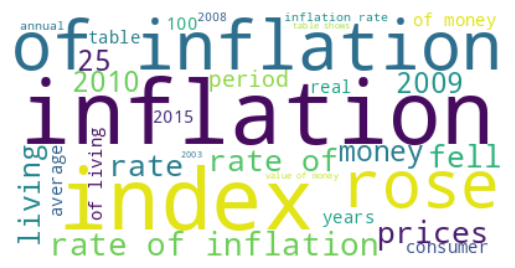

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(topic_model_better, topic=3)

## Visualize Clustering of the orginal embeddings

In [80]:
%%time
# Run the visualization with the original embeddings
topic_model_better.visualize_documents(docs, embeddings=embeddings, hide_annotations=True)

CPU times: user 20.3 s, sys: 476 ms, total: 20.8 s
Wall time: 13 s


## Topic Probability Distribution for a document

In [83]:
topic_distr, _ = topic_model_better.approximate_distribution(docs)

print(docs[1])

A local council provides a tap for drinking water in a town.     Would this make drinking water a free good?     A     No, because it is possible to exclude some people from using the tap.     B     No, because it requires the use of scarce resources.     C     Yes, because it is available to all passers by.     D     Yes, because it is impossible to charge for it.


In [84]:
topic_model_better.visualize_distribution(topic_distr[1], width=1000, custom_labels=True)

## Identify relative importance of words in determining topics for a document

In [101]:
topic_distr, topic_token_distr = topic_model_better.approximate_distribution(docs, calculate_tokens=True)

df = topic_model_better.visualize_approximate_distribution(docs[1], topic_token_distr[1])
df

,local,council,provides,tap,for,drinking,water,in,town,Would,this,make,drinking,water,free,good,No,because,it,is,possible,to,exclude,some,people,from,using,the,tap,No,because,it,requires,the,use,of,scarce,resources,Yes,because,it,is,available,to,all,passers,by,Yes,because,it,is,impossible,to,charge,for,it
0_production_advantage_possibility_production possibility,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.110,0.110,0.110,0.110,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4_public_good_private_merit,0.107,0.107,0.107,0.107,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.151,0.303,0.564,0.864,0.713,0.561,0.300,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7_shift_curve_supply curve_price of,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.138,0.138,0.138,0.138,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
13_economy_market economy_market_economic,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.104,0.104,0.104,0.104,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.102,0.102,0.102,0.102,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
15_good_of good_rise_uncertain,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.119,0.451,0.451,0.451,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
19_cross_cross elasticity_good_of demand,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.258,0.258,0.258,0.258,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
20_maximum price_maximum_quantity_price,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.145,0.145,0.145,0.145,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
23_unemployment_23_employment_unemployed,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.112,0.225,0.225,0.225,0.112,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
26_mechanism_price mechanism_rationing_resources,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.118,0.234,0.347,0.485,0.367,0.251,0.138,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
34_income_income elasticity of_income elasticity_income elasticity of demand,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.191,0.191,0.191,0.191,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00